In [380]:
import numpy as np
from scipy import integrate as intg 

import magnonRPA as rpa

from matplotlib import pyplot as plt 
from matplotlib import colors as mclr
from matplotlib import colormaps as cmaps

import time

In [423]:
Nx = 40
Ny = 40
Nz = 101
x = np.linspace(0.,2.*np.pi,Nx,endpoint=False)
y = np.linspace(0.,2.*np.pi,Ny,endpoint=False)
z = np.linspace(-10.,10.,Nz)

dz = z[1]-z[0]
print(dz)

0.1999999999999993


In [416]:
xs,ys,zs = np.meshgrid(x,y,z)

In [451]:
W = 2.2
mu = -.4
T = 0.001

In [452]:
f = rpa.gen_box_A(x,y,z,W)
h = rpa.calc_ImPi(x,y,z,f,mu,T)
h_analytic = rpa.box_ImPi(x,y,z,W,mu)

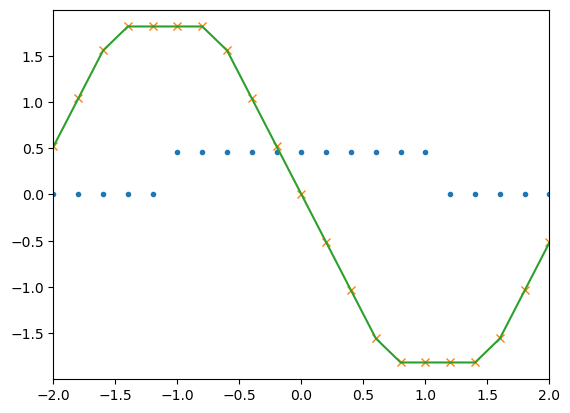

In [453]:
plt.plot(z,f[0,0,:],'.')
plt.plot(z,h[0,0,0,:],'x')
plt.plot(z,h_analytic[0,0,0,:])
plt.xlim(-2.,2.)
plt.show()

In [404]:
def convolver_freq(f,g):
    pad_size = len(f)
    f_padded = np.pad(f,(pad_size,pad_size))
    g_padded = np.pad(g,(pad_size,pad_size))

    f_fft = np.fft.ifftn(f_padded,norm='forward')
    g_fft = np.fft.ifftn(g_padded,norm='forward')

    h_fft = np.conjugate(f_fft)*g_fft

    h_padded = np.fft.fftn(h_fft,norm='forward')
    
    h = np.fft.fftshift(h_padded,axes=-1)
    
    if pad_size % 2 ==0 :
        h = h[pad_size:(len(h_padded)-pad_size+1)] ### We chop to get odd size with zero in middle

    else:
        h = h[pad_size:(len(h_padded)-pad_size)]
        
    return np.real(h)

In [262]:
z = np.linspace(-10.,10.,81)
dz = z[1]-z[0]
f = Gaussian(z,0.)*z
g = Gaussian(z,0.)
h = convolver_freq(f,g)*dz


In [263]:
h_analytic = np.zeros_like(h)
for i in range(len(h)):
    func = lambda s: Gaussian(s,0.)*np.tanh(s) * Gaussian(s+z[i],0.)
    h_analytic[i] = intg.quad(func,-10.,10.)[0]
    h_analytic[i] = -0.5*z[i]*np.exp(-z[i]**2/2.)*np.sqrt(np.pi/2.)

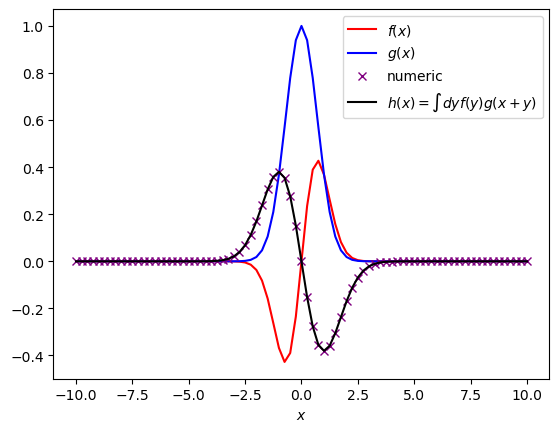

In [264]:
plt.plot(z,f,color='red',label=r'$f(x)$')
plt.plot(z,g,color='blue',label=r'$g(x)$')
plt.plot(z,h,'x',color='purple',label=r'numeric')
#plt.plot(h,'x',color='purple',label=r'numeric')
plt.plot(z,h_analytic,color='black',label=r'$h(x) = \int dy f(y) g(x+y) $')
plt.xlabel(r'$x$')
plt.legend()
plt.show()